In [1]:
cd /home/dongdong/SCR/PD1/3_all_results

/scratch/gpfs/dongdong/PD1/3_all_results


In [29]:
import pandas as pd
import numpy as np
from biopandas.pdb import PandasPdb
def ligand_center(name):
    ppdb = PandasPdb().read_pdb(name)
    all_coor=[]
    for ii in range(1,4):
        one_coor=[]
        xc=ppdb.df['ATOM'][(ppdb.df['ATOM']['chain_id']=='P') & (ppdb.df['ATOM']['atom_name']!='HN') & (ppdb.df['ATOM']['atom_name']!='HN1') & (ppdb.df['ATOM']['atom_name']!='HN2') & (ppdb.df['ATOM']['atom_name']!='HN3') & (ppdb.df['ATOM']['atom_name']!='C') & (ppdb.df['ATOM']['atom_name']!='O') & (ppdb.df['ATOM']['atom_name']!='N') & (ppdb.df['ATOM']['atom_name']!='CA') & (ppdb.df['ATOM']['residue_number']==ii)]['x_coord']
        yc=ppdb.df['ATOM'][(ppdb.df['ATOM']['chain_id']=='P') & (ppdb.df['ATOM']['atom_name']!='HN') & (ppdb.df['ATOM']['atom_name']!='HN1') & (ppdb.df['ATOM']['atom_name']!='HN2') & (ppdb.df['ATOM']['atom_name']!='HN3') & (ppdb.df['ATOM']['atom_name']!='C') & (ppdb.df['ATOM']['atom_name']!='O') & (ppdb.df['ATOM']['atom_name']!='N') & (ppdb.df['ATOM']['atom_name']!='CA') & (ppdb.df['ATOM']['residue_number']==ii)]['y_coord']
        zc=ppdb.df['ATOM'][(ppdb.df['ATOM']['chain_id']=='P') & (ppdb.df['ATOM']['atom_name']!='HN') & (ppdb.df['ATOM']['atom_name']!='HN1') & (ppdb.df['ATOM']['atom_name']!='HN2') & (ppdb.df['ATOM']['atom_name']!='HN3') & (ppdb.df['ATOM']['atom_name']!='C') & (ppdb.df['ATOM']['atom_name']!='O') & (ppdb.df['ATOM']['atom_name']!='N') & (ppdb.df['ATOM']['atom_name']!='CA') & (ppdb.df['ATOM']['residue_number']==ii)]['z_coord']
        xmean=np.mean(np.array(xc))
        ymean=np.mean(np.array(yc))
        zmean=np.mean(np.array(zc))
        one_coor.append(xmean)
        one_coor.append(ymean)
        one_coor.append(zmean)
        all_coor.append(one_coor)
    return all_coor

In [30]:
ligand_center('cls14/100_NWY_27.pdb')

[[16.414333333333335, 54.43, 114.19166666666666],
 [20.378727272727271, 58.292545454545461, 114.39154545454545],
 [16.7041, 60.796399999999991, 117.82990000000002]]

In [32]:
import glob
import os
for i in range(15):
    filenames=glob.glob('cls%d/*.pdb' %i)
    for ff in filenames:
        os.system("sed -i 's/HID/HIS/g' %s " %ff)
        os.system("sed -i 's/CYX/CYS/g' %s " %ff)


In [35]:
seq='GAVLIPFYWSTCMNQDEKRH'

8


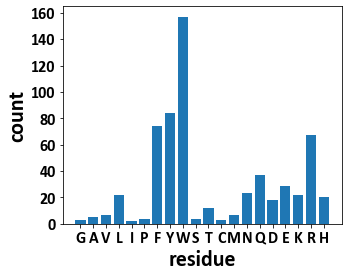

12


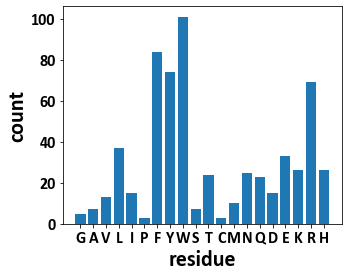

6


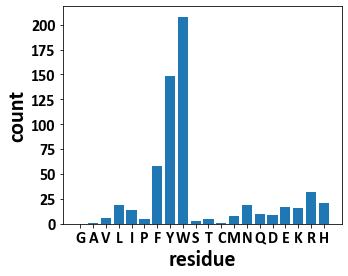

10


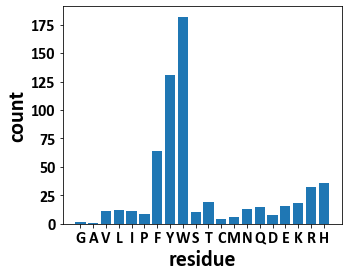

11


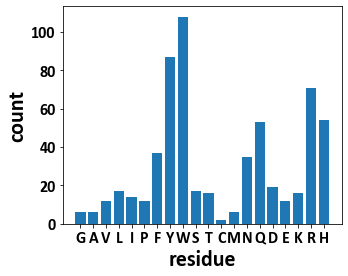

1


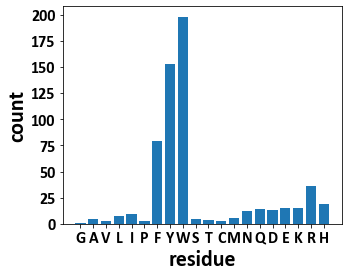

5


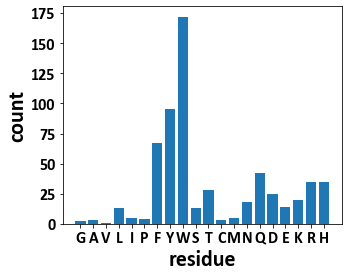

In [50]:
for i in [8,12,6,10,11,1,5]:
    print(i)
    distseq={}
    for ss in seq:
        distseq[ss]=0
    filename='cls_info%d.dat' %i
    rf=open(filename,'r')
    lines=rf.readlines()
    for line in lines:
        for ll in range(3):
            distseq[line[ll]]+=1
    fig = plt.figure(figsize=(5,4))
    sub = fig.add_subplot(1,1,1)
    plt.bar(distseq.keys(),distseq.values())
    
    sub.set_ylabel(r'count',fontproperties=font_prop)
    sub.set_xlabel(r'residue',fontproperties=font_prop)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.show()

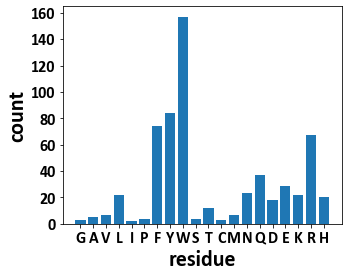

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=22)
leg_prop = font_manager.FontProperties(fname=font_path, size=20)
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(1,1,1)
plt.bar(distseq.keys(),distseq.values())

sub.set_ylabel(r'count',fontproperties=font_prop)
sub.set_xlabel(r'residue',fontproperties=font_prop)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.show()

In [40]:
distseq.keys()

dict_keys(['G', 'A', 'V', 'L', 'I', 'P', 'F', 'Y', 'W', 'S', 'T', 'C', 'M', 'N', 'Q', 'D', 'E', 'K', 'R', 'H'])

In [41]:
distseq.values()

dict_values([3, 5, 7, 22, 2, 4, 74, 84, 157, 4, 12, 3, 7, 23, 37, 18, 29, 22, 67, 20])

In [56]:
import random
pos = {'A': 3, 'B': 4, 'C': 30}
print(random.choice([x for x in pos for y in range(pos[x])]))

C


In [66]:
for i in [11]:
    print(i)
    distseq={}
    for ss in seq:
        distseq[ss]=0
    filename='cls_info%d.dat' %i
    rf=open(filename,'r')
    lines=rf.readlines()
    for line in lines:
        for ll in range(3):
            distseq[line[ll]]+=1

11


In [67]:
print(distseq)

{'G': 6, 'A': 6, 'V': 12, 'L': 17, 'I': 14, 'P': 12, 'F': 37, 'Y': 87, 'W': 108, 'S': 17, 'T': 16, 'C': 2, 'M': 6, 'N': 35, 'Q': 53, 'D': 19, 'E': 12, 'K': 16, 'R': 71, 'H': 54}


In [85]:
distseq12={'G': 5, 'A': 7, 'V': 13, 'L': 37, 'I': 15, 'P': 3, 'F': 1, 'Y': 1, 'W': 1, 'S': 7, 'T': 24, 'C': 3, 'M': 10, 'N': 25, 'Q': 23, 'D': 35, 'E': 33, 'K': 35, 'R': 169, 'H': 26}

In [86]:
distseq6={'G': 0, 'A': 1, 'V': 6, 'L': 19, 'I': 14, 'P': 5, 'F': 68, 'Y': 250, 'W': 200, 'S': 3, 'T': 5, 'C': 1, 'M': 8, 'N': 19, 'Q': 10, 'D': 9, 'E': 17, 'K': 16, 'R': 32, 'H': 21}

In [87]:
distseq11={'G': 6, 'A': 6, 'V': 12, 'L': 17, 'I': 14, 'P': 12, 'F': 3, 'Y': 8, 'W': 1, 'S': 17, 'T': 16, 'C': 2, 'M': 6, 'N': 35, 'Q': 120, 'D': 19, 'E': 12, 'K': 16, 'R': 150, 'H': 54}

In [104]:
seq12=[x for x in distseq12 for y in range(distseq12[x])]
seq6=[x for x in distseq6 for y in range(distseq6[x])]
seq11=[x for x in distseq11 for y in range(distseq11[x])]
wf=open('/home/dongdong/SCR/PD1/new12seq2.seq','w')
numseq=100
numres=8
for ii in range(numseq):
    for jj in range(2):
        wf.write(random.choice(seq11))
    for jj in range(2):
        wf.write(random.choice(seq6))
    for jj in range(2):
        wf.write(random.choice(seq12))
    for jj in range(2):
        wf.write(random.choice(seq12))
    for jj in range(2):
        wf.write(random.choice(seq6))
    for jj in range(2):
        wf.write(random.choice(seq11))
    wf.write('\n')
wf.close()


In [90]:
seq12=[x for x in distseq12 for y in range(distseq12[x])]
seq6=[x for x in distseq6 for y in range(distseq6[x])]
seq11=[x for x in distseq11 for y in range(distseq11[x])]
wf=open('new6seq2.seq','w')
numseq=200
numres=8
for ii in range(numseq):
    for jj in range(2):
        wf.write(random.choice(seq12))
    wf.write('Y')
    wf.write(random.choice(seq6))
    for jj in range(2):
        wf.write(random.choice(seq11))
    wf.write('\n')
wf.close()

In [111]:
cd /home/dongdong/SCR/PD1/new_results/vs12

/scratch/gpfs/dongdong/PD1/new_results/vs12


In [114]:
wf=open('top_pdb.txt','w')
for i in range(1,11):
    filename='output%d.txt' %i
    rf=open(filename,'r')
    for line in rf.readlines()[1:]:
        line=line.strip()
        pep=line.split()[0]+'.pdb'
        score=float(line.split()[1])
        if score<=-12.5:
            wf.write(line+'\n')
            pdbname='/home/dongdong/SCR/PD1/new_results/vs12/results_%d_sh/vs/PD1_sh/Results/docked_pdb_top/%s' %(i,pep)
            outname='/home/dongdong/SCR/PD1/new_results/vs12/pdb_top/%s' %pep
            os.system('cp %s %s' %(pdbname,outname))
wf.close()

In [116]:
PD1_hot=[75,134,126,84,78,68,128,66]
rf=open('top_pdb.txt','r')
lines=rf.readlines()
new_lines=sorted(lines,key=lambda r:float(r.split()[1]))
#print(new_lines)
wf=open('score_interface.txt','w')
wf2=open('score_interface_filter.txt','w')
for line in new_lines:
    line=line.strip()
    peptide=line.split()[0]
    score=line.split()[1]
    wf.write(line+'    ')
    interface_name='pdb_top/out_'+peptide+'/molecule_1.txt'
    indata=open(interface_name,'r')
    nn=0
    for ii in indata.readlines():
        ii=ii.strip()
        resid=int(ii.split()[1])
        if int(resid) in PD1_hot:
            nn+=1
    if nn>7:
        wf2.write(line+'    '+str(nn)+'\n')
    wf.write(str(nn)+'\n')
wf.close()
wf2.close()

In [110]:
rf=open('score_interface_filter.txt','r')
for line in rf.readlines():
    line=line.strip()
    pep=line.split()[0]+'.pdb'
    pdbname='pdb_top/%s' %pep
    outname='pdb_top_filter/%s' %pep
    os.system('cp %s %s' %(pdbname,outname))

In [118]:
cd ..

/scratch/gpfs/dongdong/PD1/new_results


In [132]:
distseq6={'G': 0, 'A': 1, 'V': 6, 'L': 29, 'I': 14, 'P': 5, 'F': 68, 'Y': 150, 'W': 70, 'S': 3, 'T': 5, 'C': 1, 'M': 8, 'N': 19, 'Q': 10, 'D': 9, 'E': 17, 'K': 16, 'R': 32, 'H': 21}
distseq12={'G': 5, 'A': 7, 'V': 13, 'L': 37, 'I': 15, 'P': 3, 'F': 10, 'Y': 10, 'W': 10, 'S': 7, 'T': 24, 'C': 3, 'M': 10, 'N': 25, 'Q': 23, 'D': 35, 'E': 33, 'K': 35, 'R': 69, 'H': 26}
distseq11={'G': 6, 'A': 6, 'V': 12, 'L': 17, 'I': 14, 'P': 5, 'F': 3, 'Y': 18, 'W': 1, 'S': 17, 'T': 16, 'C': 2, 'M': 6, 'N': 35, 'Q': 80, 'D': 19, 'E': 12, 'K': 16, 'R': 120, 'H': 54}
distseq={'G': 0, 'A': 1, 'V': 6, 'L': 29, 'I': 14, 'P': 315, 'F': 68, 'Y': 150, 'W': 70, 'S': 3, 'T': 5, 'C': 1, 'M': 8, 'N': 19, 'Q': 10, 'D': 9, 'E': 17, 'K': 16, 'R': 32, 'H': 21}
seq12=[x for x in distseq12 for y in range(distseq12[x])]
seq6=[x for x in distseq6 for y in range(distseq6[x])]
seq11=[x for x in distseq11 for y in range(distseq11[x])]
seq=[x for x in distseq for y in range(distseq[x])]
wf=open('/home/dongdong/SCR/PD1/cyc8_3.seq','w')
numseq=100
numres=8
for ii in range(numseq):
    wf.write(random.choice(seq11))
    wf.write('Y')
     
    wf.write(random.choice(seq11))
    
    for jj in range(2):
        wf.write(random.choice(seq12))
    wf.write(random.choice(seq6))
    wf.write(random.choice(seq))
    wf.write(random.choice(seq11))
   

    wf.write('\n')
wf.close()

In [165]:
cd /home/dongdong/SCR/PD1/ADCP/cyc/

/scratch/gpfs/dongdong/PD1/ADCP/cyc


In [166]:
wf=open('top_pdb.txt','w')
import glob
files=glob.glob('sorted*')
for ff in files:
    rf=open(ff,'r')
    for line in rf.readlines()[1:32]:
        wf.write(line)
wf.close()

In [168]:
PD1_hot=[75,134,126,84,78,68,128,66]
rf=open('top_pdb.txt','r')
lines=rf.readlines()
new_lines=sorted(lines,key=lambda r:float(r.split()[1]))
#print(new_lines)
wf=open('score_interface.txt','w')
wf2=open('score_interface_filter.txt','w')
for line in new_lines:
    line=line.strip()
    peptide=line.split()[0]
    score=line.split()[1]
    wf.write(line+'    ')
    interface_name='docked_pdb_top/out_'+peptide+'/molecule_1.txt'
    indata=open(interface_name,'r')
    nn=0
    for ii in indata.readlines():
        ii=ii.strip()
        resid=int(ii.split()[1])
        if int(resid) in PD1_hot:
            nn+=1
    if nn>7:
        wf2.write(line+'    '+str(nn)+'\n')
    wf.write(str(nn)+'\n')
wf.close()
wf2.close()

In [169]:
rf=open('score_interface_filter.txt','r')
for line in rf.readlines()[0:21]:
    line=line.strip()
    score=line.split()[1]
    pep=line.split()[0]+'.pdb'
    pdbname='docked_pdb_top/%s' %pep
    outname='docked_pdb_top_filter/%s' %pep
    os.system('cp %s %s' %(pdbname,outname))



In [145]:
import mdtraj as md

In [159]:
cd /home/dongdong/SCR/PD1/ADCP/md/

/scratch/gpfs/dongdong/PD1/ADCP/md


/home/dongdong/software/anaconda3/envs/py3.6/lib/python3.6/site-packages/mdtraj/core/trajectory.py:419: UserWarning: top= kwarg ignored since file contains topology information
  warnings.warn('top= kwarg ignored since file contains topology information')


In [148]:
top=traj.topology

In [164]:
import mdtraj as md
import os
import glob
os.chdir('/home/dongdong/SCR/PD1/ADCP/md/')
dirnames=glob.glob('*_1_0001')
dirnames=['ptywhrqhfyer_1_0001']
for dd in dirnames:
    os.chdir(dd)
    os.system('echo -e "q\n" | gmx make_ndx -f md.gro')
    traj = md.load('md.gro', top='md.gro')
    top=traj.topology
    backbone_index=top.select("backbone")+1
    protein_index=top.select("protein")+1
    with open("index.ndx", "a") as myfile:
        myfile.write("[ chainA ]\n")
        n=0
        for pp in protein_index:
            if pp <1759:
                myfile.write(str(pp)+'  ')
                n+=1
                if n % 15 == 0:
                    myfile.write('\n')
        n=0
        myfile.write("\n[ chainB ]\n")       
        for pp in protein_index:
            if pp >1758:
                myfile.write(str(pp)+'  ')
                n+=1
                if n % 15 == 0:
                    myfile.write('\n')
    
        myfile.write("\n[ Backbone-A ]\n")
        n=0
        for pp in backbone_index:
            if pp <1759:
                myfile.write(str(pp)+'  ')
                n+=1
                if n % 15 == 0:
                    myfile.write('\n')
        n=0
        myfile.write("\n[ Backbone-B ]\n")       
        for pp in backbone_index:
            if pp >1758:
                myfile.write(str(pp)+'  ')
                n+=1
                if n % 15 == 0:
                    myfile.write('\n')
    os.system('echo -e "1\n" | gmx trjconv -f md.xtc -s md.tpr -o md_nopbc.xtc -ur compact -pbc mol')
    os.system('echo -e "19\n1\n" | gmx trjconv -f md_nopbc.xtc -s md.tpr -o md_cen.xtc -center -n index.ndx ')
    os.system('echo -e "1\n" | gmx trjconv -f md_cen.xtc -s md.tpr -o md_res.xtc -ur compact -pbc res')
    os.system('echo -e "1\n" | gmx trjconv -f md_res.xtc -s md.tpr -o md_done.xtc -ur compact -pbc mol')
    os.system('echo -e "19\n1\n" | gmx trjconv -f md_done.xtc -s md.tpr -o fit.xtc -fit rot+trans -n index.ndx')
    os.system('gmx trjconv -s md.tpr -f fit.xtc  -o begin.pdb -b 0 -e 0 -tu ns')
    os.system('gmx trjconv -s md.tpr -f fit.xtc  -o end.pdb -b 50 -e 50 -tu ns')
    os.system('rm -f md_cen.xtc md_nopbc.xtc md_res.xtc md_done.xtc')
    #os.systemem('')
    #os.systemem('')
    #os.systemem('')
    
                    

In [ ]:
filename="top_result.txt"
rf=open(filename,'r')
for line in rf.readlines():
    line=line.strip()
    pep=line.split()[0]+'.pdb'
    pdbname='COPI_WBP1_Complex5_0001_chainA_final/Results/complex/%s' %pep
    outname='top_pdb/%s' %pep
    os.system('cp %s %s' %(pdbname,outname))

In [1]:
cd /home/dongdong/SCR/PD1/ADCP/md/rosetta/mu01

/scratch/gpfs/dongdong/PD1/ADCP/md/rosetta/mu01


In [25]:
import os
cc=-1
os.mkdir('new_aggre_filter_pos%d_pdb' %cc)
wf=open('new_aggre_filter_pos%d.dat' %cc,'w')
rf=open('aggre_filter.dat','r')
lines=rf.readlines()
allseq=[]
for line in lines:
    line=line.strip()
    ssfile='fasta/%s.pdb_chainB_PROP/%s.pdb_chainB.ss3_simp' %(line,line)
    ssdata=open(ssfile,'r').readlines()
    ss=ssdata[2]
    name=ssdata[0]
    seq=ssdata[1]
    allseq.append(seq)
    countH=ss.count('H')
    negchar=int(seq.count('D'))+int(seq.count('E'))
    poschar=int(seq.count('R'))+int(seq.count('K'))
    netchar=poschar-negchar
    if netchar==cc:
        wf.write(name+seq)
        
        os.system('cp pdb/%s.pdb new_aggre_filter_pos%d_pdb/%s.pdb' %(line,cc,line))
        print(name)
        print(seq)
        print(netchar)
    #print(ss)
    #print(countH)
print(len(set(allseq)))
wf.close()
rf.close()

>des10_rkwyqtdlyykk_1_0001_0291.pdb_chainB

PNDNRWYEKDLKENNERSG

-1
>des35_rkwyqtdlyykk_1_0002_06522.pdb_chainB

GDDRDRRFSEDLRKLRESEG

-1
>des20_rkwyqtdlyykk_1_0002_06742.pdb_chainB

GDERNEKWEEDLKKLREKWG

-1
>des25_rkwyqtdlyykk_1_0002_09263.pdb_chainB

GKSDASKWEEDLRKLREEHG

-1
>des21_rkwyqtdlyykk_1_0002_02697.pdb_chainB

GEDRNRVYEHDLRRLRESEG

-1
>des27_rkwyqtdlyykk_1_0002_06644.pdb_chainB

GAAKDETWDHDIKRLNERHG

-1
>des20_rkwyqtdlyykk_1_0002_07120.pdb_chainB

GHERNRVYEEDLRKLREESG

-1
>des21_rkwyqtdlyykk_1_0002_06125.pdb_chainB

GFDRARAYEEDIKKHNEAHG

-1
>des19_rkwyqtdlyykk_1_0002_05472.pdb_chainB

GHDRAKAYDKDIRDNFESSG

-1
>des26_rkwyqtdlyykk_1_0002_09542.pdb_chainB

GESNASKWEHDLRRLRESEG

-1
>des36_rkwyqtdlyykk_1_0002_02535.pdb_chainB

GRSEAERLEKDLKELRESSG

-1
>des27_rkwyqtdlyykk_1_0002_03120.pdb_chainB

GDSSAEKWEKDLRRLNESHG

-1
>des24_rkwyqtdlyykk_1_0002_03748.pdb_chainB

GANHAESYERDIKRMRESEG

-1
>des21_rkwyqtdlyykk_1_0002_06051.pdb_chainB

GESANHAYEKDLRDLRERAG

-1
>des35_rkwyqtdlyykk_1_

In [26]:
cd /home/dongdong/SCR/PD1/ADCP/md/rosetta/mu01/final

/scratch/gpfs/dongdong/PD1/ADCP/md/rosetta/mu01/final


In [48]:
fname=['-2','-1','0','1','2']
wf=open('all_rmsd0.34.fasta','w')
for ss in fname:
    ff=open('final%s.dat' %ss,'r')
    lines=ff.readlines()
    for line in lines:
        line=line.strip()
        name=line.split()[0][:-5]
        beginscore=float(line.split()[1])
        endscore=float(line.split()[2])
        rmsd=float(line.split()[3])
        #if endscore<-180 and rmsd<0.56:
        if rmsd<0.34:
            ssfile='../fasta/%s.pdb_chainB_PROP/%s.pdb_chainB.ss3_simp' %(name,name)
            ssdata=open(ssfile,'r').readlines()
            seq=ssdata[1]
            wf.write('>%s_%f_%f_%f_charge%s\n%s' %(name,beginscore,endscore,rmsd,ss,seq))
wf.close()

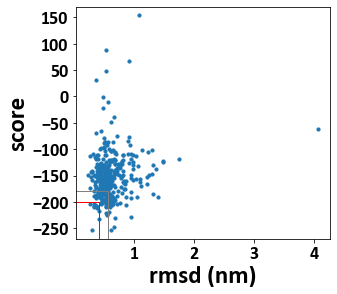

In [46]:
fname=['-2','-1','0','1','2']
allrmsd=[]
allscore=[]
for ss in fname:
    ff=open('final%s.dat' %ss,'r')
    lines=ff.readlines()
    for line in lines:
        line=line.strip()
        name=line.split()[0][:-5]
        beginscore=float(line.split()[1])
        endscore=float(line.split()[2])
        rmsd=float(line.split()[3])
        allrmsd.append(rmsd)
        allscore.append(endscore)
        
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=25)
leg_prop = font_manager.FontProperties(fname=font_path, size=20)
fig = plt.figure(figsize=(4.6,4))


sub = fig.add_subplot(1,1,1)
sub.scatter(allrmsd,allscore,s=10)
sub.set_ylabel(r'score',fontproperties=font_prop)
sub.set_xlabel(r'rmsd (nm)',fontproperties=font_prop)
sub.add_patch(patches.Rectangle((0, -270),0.42,70, linewidth=1,edgecolor='r',facecolor='none'))
sub.add_patch(patches.Rectangle((0, -270),0.56,90, linewidth=1,edgecolor='gray',facecolor='none'))
#sub.tick_params(direction="in", length=1)
plt.ylim(-270,170)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(18)
plt.savefig('score_rmsd.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()